# WeatherPy
----

### Conclusions:
* There is no significant correlation between the latitude and wind speed plot.
* Latitude and cloudiness also didn't have a strong relationship, but there was a strong consistency of data for the 0% and around 90% marks.
* This data clearly shows temperatures are higher as they approach the equator, which we all know to be true.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Import API key
import api_keys

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
print(url)
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4dcae97b59b97c99641126a9506f1665
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | katima mulilo
Processing Record 5 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 1 | santa fe
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | abha
Processing Record 11 of Set 1 | lorengau
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | kamenka
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | ustka
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | saint anthony
Processing Record 18 of Set 1 | bastia
Processing Record 19 of Set 1 | farmingto

Processing Record 35 of Set 4 | avarua
Processing Record 36 of Set 4 | beausejour
Processing Record 37 of Set 4 | bambous virieux
Processing Record 38 of Set 4 | naze
Processing Record 39 of Set 4 | chumikan
Processing Record 40 of Set 4 | teahupoo
Processing Record 41 of Set 4 | bereda
Processing Record 42 of Set 4 | pagegiai
Processing Record 43 of Set 4 | black river
Processing Record 44 of Set 4 | manhattan beach
Processing Record 45 of Set 4 | mar del plata
Processing Record 46 of Set 4 | beloha
Processing Record 47 of Set 4 | barabai
Processing Record 48 of Set 4 | vaini
Processing Record 49 of Set 4 | lesogorskiy
Processing Record 0 of Set 5 | tiznit
Processing Record 1 of Set 5 | mikhaylovka
Processing Record 2 of Set 5 | saldanha
Processing Record 3 of Set 5 | belokurikha
Processing Record 4 of Set 5 | namibe
Processing Record 5 of Set 5 | fortuna
Processing Record 6 of Set 5 | obigarm
Processing Record 7 of Set 5 | upernavik
Processing Record 8 of Set 5 | poum
Processing Reco

Processing Record 21 of Set 8 | baillif
Processing Record 22 of Set 8 | durban
Processing Record 23 of Set 8 | igarka
Processing Record 24 of Set 8 | port lincoln
Processing Record 25 of Set 8 | hobyo
Processing Record 26 of Set 8 | caxito
Processing Record 27 of Set 8 | akhaldaba
Processing Record 28 of Set 8 | kaeo
Processing Record 29 of Set 8 | yar-sale
Processing Record 30 of Set 8 | peshkovo
Processing Record 31 of Set 8 | gremyachinsk
Processing Record 32 of Set 8 | aksha
Processing Record 33 of Set 8 | saint-pierre
Processing Record 34 of Set 8 | port hardy
Processing Record 35 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 36 of Set 8 | kastornoye
Processing Record 37 of Set 8 | saint-joseph
Processing Record 38 of Set 8 | hokitika
Processing Record 39 of Set 8 | birjand
Processing Record 40 of Set 8 | tabory
Processing Record 41 of Set 8 | emerald
Processing Record 42 of Set 8 | santa cruz
Processing Record 43 of Set 8 | tawkar
City not found. Skipping..

Processing Record 1 of Set 12 | kozhva
Processing Record 2 of Set 12 | santa ana
Processing Record 3 of Set 12 | elliot
Processing Record 4 of Set 12 | sinnamary
Processing Record 5 of Set 12 | carutapera
Processing Record 6 of Set 12 | lithakia
Processing Record 7 of Set 12 | jijiga
Processing Record 8 of Set 12 | mocuba
Processing Record 9 of Set 12 | nawa
Processing Record 10 of Set 12 | abong mbang
Processing Record 11 of Set 12 | kalaleh
Processing Record 12 of Set 12 | colares
Processing Record 13 of Set 12 | biloela
Processing Record 14 of Set 12 | hamilton
Processing Record 15 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 16 of Set 12 | yulara
Processing Record 17 of Set 12 | batagay
Processing Record 18 of Set 12 | vestmannaeyjar
Processing Record 19 of Set 12 | digapahandi
Processing Record 20 of Set 12 | umiray
Processing Record 21 of Set 12 | verkhoyansk
Processing Record 22 of Set 12 | northam
Processing Record 23 of Set 12 | madimba
Processing Record 24 of Set 1

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          536
Cloudiness    536
Country       536
Date          536
Humidity      536
Lat           536
Lng           536
Max Temp      536
Wind Speed    536
dtype: int64

In [5]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hithadhoo,76,MV,1547424106,100,-0.60,73.08,81.01,6.78
1,east london,20,ZA,1547423503,100,-33.02,27.91,70.62,8.46
2,mataura,88,NZ,1547423725,86,-46.19,168.86,57.57,10.25
3,katima mulilo,12,NA,1547424107,91,-17.50,24.28,66.52,1.41
4,santa fe,92,AR,1547424020,97,-31.62,-60.70,73.18,5.21


## Latitude vs Temperature Plot

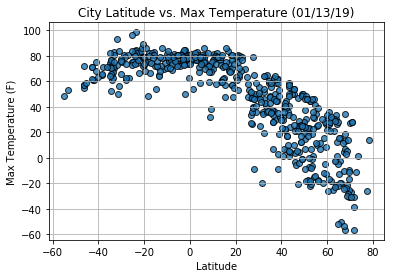

In [6]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

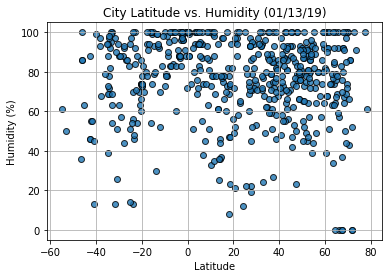

In [7]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

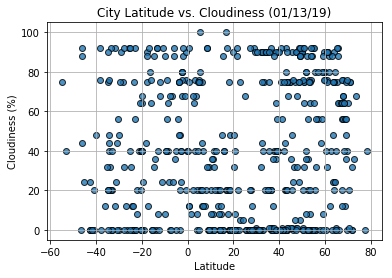

In [8]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

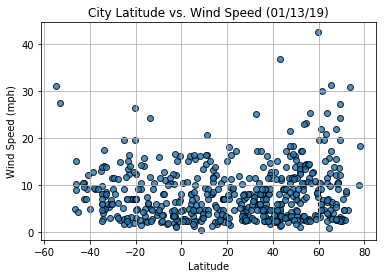

In [9]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()